In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib import animation
from matplotlib import rc
rc('animation', html='html5')

cmap = colors.ListedColormap(['White','Blue','Green','Red'])

In [2]:
class Animal:
    
    # requried variables: needed for subclasses
    location = [0,0]
    stepSize = 1
    mapSize = 0
    foodEaten = 0
    hunger = 0
    maxHunger = 0
    probRepro = 0
    sense = 1
    alive = True
    beStill = False
    
    def __init__(self, mapSize, stepSize=None, location=None, maxHunger = 1000):
        
        if location == None:
            location = [np.random.randint(0, mapSize), np.random.randint(0, mapSize)]
        self.location = location
                
        self.mapSize = mapSize
        self.foodEaten = 0
        self.hunger = 0
        self.alive = True
        self.maxHunger = maxHunger
        
    def step(self):
        self.hunger = self.hunger + 1
        #move once for every stepSize
        for i in range(0, self.stepSize):
            
            #one for each direction
            direct = np.random.randint(0,8)
            
            # if the direction is 1,0,7 move x by +1
            if ((direct==0) or (direct==1) or (direct==7)):
                self.location[0] = self.location[0] + 1
                
            # if the direction is 1,2,3 move y by +1
            if ((direct==1) or (direct==2) or (direct==3)):
                self.location[1] = self.location[1] + 1
                
            # if the direction is 3,4,5 move x by -1
            if ((direct==3) or (direct==4) or (direct==5)):
                self.location[0] = self.location[0] - 1
                
            # if the direction is 5,6,7 move y by -1
            if ((direct==5) or (direct==6) or (direct==7)):
                self.location[1] = self.location[1] - 1
        self.locationCheck()
            
    # check if location needs to wrap
    def locationCheck(self):
        
        for i in range(0,2):
            if (self.location[i] >= self.mapSize):
                self.location[i] = self.location[i] - self.mapSize
            elif (self.location[i] < 0):
                self.location[i] = self.mapSize - abs(self.location[i])
    

In [3]:
class Food:
    location = []
    eaten = False
    mapSize = 0
    
    def __init__(self, mapSize, location = None):
        
        if location == None:
            location = [np.random.randint(0, mapSize), np.random.randint(0, mapSize)]
        self.location = location
        
        self.mapSize = mapSize

In [4]:
class Rabbit(Animal):
    
    probRepro = 0.5
    litter = 1                                     # Edit this value?
    species = 'Rabbit'
    eatMush = False
    
    def reproduced(self, rabbit2):
        self.hunger = self.hunger * 1.25           # Edit this value?
        rabbit2.hunger = rabbit2.hunger * 1.25     # Edit this value?
        
    def interactRabbit(self, rabbit, animalArray):
        together = False
        if not rabbit.beStill:
            together = vicinityCheck(self, rabbit)
        if together:
            if ((np.random.rand() < self.probRepro)):
                for i in range(0, self.litter):
                    self.reproduce(animalArray, self)
                self.reproduced(rabbit)
        
    def interactMushroom(self, mushroom):
        together = vicinityCheck(self, mushroom)
        if together:
            mushroom.eaten = True
            self.hunger = self.hunger / 1.25       # Edit this value?
    
    def reproduce(self, animalArray, animal):
#         animalArray.append(Rabbit(self.mapSize, stepSize=self.stepSize, location=self.location))
#         animalArray[-1].step()
        x = self.location[0]
        y = self.location[1]
        animalArray.append(Rabbit(self.mapSize, stepSize=self.stepSize, location=[x,y]))
        print(animalArray[-1].location)
        animalArray[-1].step()
        print(animalArray[-1].location)


In [5]:
class Fox(Animal):
    
    probRepro = 0.3
    litter = 1                                         # Edit this value?
    species = 'Fox'
    
    def reproduced(self, fox):
        self.hunger = self.hunger * 1.25               # Edit this value?
        fox.hunger = fox.hunger * 1.25                 # Edit this value?
        
    def interactRabbit(self, rabbit):
        together = False
        if not rabbit.beStill:
            together = vicinityCheck(self, rabbit)
        if (together):
            rabbit.beStill = True
            self.hunger = self.hunger / 1.25 # Edit this value?
        
    def interactFox(self, fox, animalArray):
        together = False
        if not fox.beStill:
            together = vicinityCheck(self, fox)
        if together:
            if ((np.random.rand() < self.probRepro)):
                for i in range(0, self.litter):
                    self.reproduce(animalArray, self)
                self.reproduced(fox)
                
    def reproduce(self, animalArray, animal):
        x = self.location[0]
        y = self.location[1]
        animalArray.append(Fox(self.mapSize, stepSize=self.stepSize, location=[x,y]))
        print(animalArray[-1].location)
        animalArray[-1].step()
        print(animalArray[-1].location)

In [6]:
class Mushroom(Food):
    
    species = 'Mushroom'

In [41]:
class Ecosystem:
    def __init__(self, rows):
        self.mapSize = rows
        self.grid = np.zeros((rows, rows), dtype=int)
        self.foxes_array = []
        self.rabbits_array = []
        self.mush_array = []
        
    def createFoxes(self, numFoxes, fox_step_size):
        for i in range(numFoxes):
            fox = Fox(mapSize=self.mapSize, stepSize=fox_step_size)
            self.foxes_array.append(fox)
    
    def createRabbits(self, numRabbits, rabbit_step_size):
        for i in range(numRabbits):
            rabbit = Rabbit(mapSize=self.mapSize, stepSize=rabbit_step_size)
            self.rabbits_array.append(rabbit)
        
    def createMushrooms(self, numMushrooms):
        for i in range(numMushrooms):
            mush = Mushroom(mapSize=self.mapSize)
            self.mush_array.append(mush)
            
    def step(self):
        for i in range(len(self.foxes_array)):
            self.foxes_array[i].step()
        for i in range(len(self.rabbits_array)):
            self.rabbits_array[i].step()
            
    def mapToGrid(self):
        self.grid = np.zeros((self.mapSize, self.mapSize), dtype=int)

        # map a mushroom if its still not eaten
        for i in range(len(self.mush_array)):
            if not self.mush_array[i].eaten:
                x = self.mush_array[i].location[0]
                y = self.mush_array[i].location[1]
                self.grid[x, y] = 1
        print(i)
        # map a rabbit to grid if its alive
        for i in range(len(self.rabbits_array)):
            if not self.rabbits_array[i].beStill:
                x = self.rabbits_array[i].location[0]
                y = self.rabbits_array[i].location[1]
                self.grid[x, y] = 2
        print(i)
        # map a fox to grid if its alive
        for i in range(len(self.foxes_array)):
            if not self.foxes_array[i].beStill:
                x = self.foxes_array[i].location[0]
                y = self.foxes_array[i].location[1]
                self.grid[x, y] = 3
        print(i)
        return self.grid
    
    def plotGrid(self, grid):
        plt.imshow(grid[::-1],cmap=cmap)
        #off = plt.axis(off)
        
    def animate(self, numSteps=20):
        fig = plt.figure()

        grid = self.mapToGrid()
        img = plt.imshow(grid[::-1],cmap=cmap, animated=True)

        ims = []
        for step in range(numSteps):
            self.step()

            # check interactions
            ## TODO: UPDATE THESE
            self.checkInteractions()
            #foxes_array, rabbits_array, mush_array = removeTheDead(foxes_array, rabbits_array, mush_array)

            # plot stuffs
            grid = self.mapToGrid()
            img = plt.imshow(grid[::-1],cmap=cmap, animated=True)
            ims.append([img])

        return animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                        repeat_delay=1000)
    
    def checkInteractions(self):
        # only want to loop through existing animals / mushrooms
        currRabbits = len(self.rabbits_array)
        currFoxes = len(self.foxes_array)
        currMush = len(self.mush_array)
    
        print("Rabbits")
        # check rabbit interactions
        for i in range(currRabbits):
            rabbit = self.rabbits_array[i]
            # does the rabbit reproduce
            for j in range(currRabbits):
                if j != i:
                    rabbit.interactRabbit(self.rabbits_array[j], self.rabbits_array)
            # does the rabbit eat a mushroom
            for k in range(currMush):
                rabbit.interactMushroom(self.mush_array[k])
    
        print("Foxes")
        # check fox interactions
        for i in range(currFoxes):
            fox = self.foxes_array[i]
            # does the fox reproduce
            for j in range(currFoxes):
                if j != i:
                    fox.interactFox(self.foxes_array[j], self.foxes_array)
            # does the fox eat a rabbit
            for k in range(currRabbits):
                fox.interactRabbit(self.rabbits_array[k])

In [38]:
def hungerCheck(animalArray):
        
    everyoneDead = True
    maxHunger = animalArray[0].maxHunger
    
    for i in range(0, len(animalArray)):
        
        hunger = animalArray[i].hunger
        
        if hunger > maxHunger:
            animalArray[i].beStill = True
        else:
            everyoneDead = False
            
    return animalArray, everyoneDead

def vicinityCheck(animal1, animal2):
    
    a1X = animal1.location[0]
    a1Y = animal1.location[1]
    a2X = animal2.location[0]
    a2Y = animal2.location[1]
    sense = animal1.sense
    nearby = False
    
    for i in range(-sense, (sense+1)):
        if (a1X == (a2X + i)):
            for j in range(-sense, (sense+1)):
                if (a1Y == (a2Y + j)):
                    nearby = True
                    break
    return nearby

In [9]:
# def checkInteractions(foxes_array, rabbits_array, mush_array):
#     # only want to loop through existing animals / mushrooms
#     currRabbits = len(rabbits_array)
#     currFoxes = len(foxes_array)
#     currMush = len(mush_array)

#     # check rabbit interactions
#     for i in range(currRabbits):
#         rabbit = rabbits_array[i]
#         # does the rabbit reproduce
#         for j in range(currRabbits):
#             if j != i:
#                 rabbit.interactRabbit(rabbits_array[j], rabbits_array)
#         # does the rabbit eat a mushroom
#         for k in range(currMush):
#             rabbit.interactMushroom(mush_array[k])

#     # check fox interactions
#     for i in range(currFoxes):
#         fox = foxes_array[i]
#         # does the fox reproduce
#         for j in range(currFoxes):
#             if i != k:
#                 fox.interactFox(foxes_array[j], foxes_array)
#         # does the fox eat a rabbit
#         for k in range(currRabbits):
#             fox.interactRabbit(rabbits_array[k])
            
#     return foxes_array, rabbits_array, mush_array

In [10]:
def removeTheDead(foxes_array, rabbits_array, mush_array):
    #check if animals have died of starvation
    foxes_array, eDead = hungerCheck(foxes_array)
    rabbits_array, eDead = hungerCheck(rabbits_array)
    
    # remove dead animals
    foxes_array = [ fox for fox in foxes_array if not fox.beStill]   
    rabbits_array = [ rabbit for rabbit in rabbits_array if not rabbit.beStill]
    
    # remove mushrooms that have been eaten
    mush_array = [ mush for mush in mush_array if not mush.eaten]
    
    return foxes_array, rabbits_array, mush_array

19
9
4


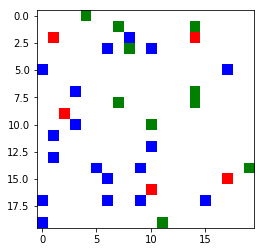

In [44]:
## Declarations
rows=20

eco = Ecosystem(rows)

#Population of Species
numFoxes=5
numRabbits=10
numMushrooms=20

rabbit_step_size=8
fox_step_size=4

## Initialise and Spawn Foxes & Rabbits
    
# Foxes
eco.createFoxes(numFoxes, fox_step_size)
    
# Rabbits
eco.createRabbits(numRabbits, rabbit_step_size)
    
# Mushrooms
eco.createMushrooms(numMushrooms)

# Show the initial state of the forest
data = eco.mapToGrid()
eco.plotGrid(data)

19
9
4
Rabbits
Foxes
19
9
4
Rabbits
Foxes
19
9
4
Rabbits
Foxes
19
9
4
Rabbits
Foxes
19
9
4
Rabbits
[19, 3]
[19, 2]
Foxes
19
10
4


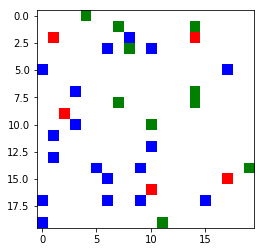

In [45]:
frames = 5
anim = eco.animate(frames)

In [46]:
anim

19
9
4


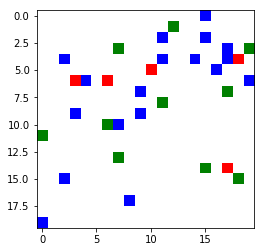

In [14]:
data = eco.mapToGrid()
eco.plotGrid(data)

Text(0.5,0,'X')

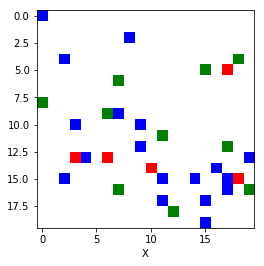

In [15]:
plt.imshow(data[::],cmap=cmap)
plt.xlabel("X")

In [16]:
for i in range(len(eco.foxes_array)):
    print(eco.foxes_array[i].location)
    
# for i in range(len(eco.rabbits_array)):
#     print(eco.rabbits_array[i].location)

[13, 6]
[5, 17]
[15, 18]
[13, 3]
[14, 10]


In [17]:
currRabbits = len(eco.rabbits_array)
for i in range(currRabbits):
    rabbit = eco.rabbits_array[i]
    # does the rabbit reproduce
    for j in range(currRabbits):
        if j != i:
            rabbit.interactRabbit(eco.rabbits_array[j], eco.rabbits_array)

Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x


In [18]:
eco.checkInteractions()

Rabbits
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Foxes
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x
Matching x


In [19]:
len(eco.foxes_array), len(eco.rabbits_array), len(eco.mush_array)

(5, 10, 20)

In [20]:
eco.step()

19
9
4


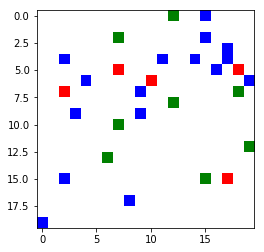

In [21]:
data = eco.mapToGrid()
eco.plotGrid(data)

# when a new animal is born, it goes to the same space as its parent
# the new born is then never becoming its own creature, and always moves the same as the parent

In [22]:
foxes_array, rabbits_array, mush_array = removeTheDead(eco.foxes_array, eco.rabbits_array, eco.mush_array)

In [23]:
foxes_array, eDead = hungerCheck(foxes_array)
rabbits_array, eDead = hungerCheck(rabbits_array)

In [24]:
eco.rabbits_array[2].location = [59,69]


In [25]:
for fox in foxes_array:
    if fox.beStill:
        print("fox dead")

In [26]:
foxes_array

In [27]:
x = 10
y = 11

if x != y:
    print("no")

no


In [28]:
data[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
testRabbits = []
for i in range(numRabbits):
    rabbit = Rabbit(mapSize=rows, stepSize=rabbit_step_size)
    testRabbits.append(rabbit)

In [30]:
for i in range(len(testRabbits)):
    if i % 3 == 0:
        testRabbits[i].beStill = True

In [31]:
toRemoveF = []
for i in range(len(testRabbits)):
    rab = testRabbits[i]
    if rab.beStill:
        print("dead rab")
        print(i)
        toRemoveF.append(i)

dead rab
0
dead rab
3
dead rab
6
dead rab
9


In [32]:
testRabbits = [ rabbit for rabbit in testRabbits if not rabbit.beStill]

In [33]:
len(testRabbits)

6

In [34]:
sense = 1

print(range(-sense, sense))

range(-1, 1)


In [35]:
for i in range(-sense, sense+1):
    print(i)

-1
0
1
